In [87]:
import numpy as np
import pandas as pd

# import pmaw
# import psaw
# from psaw import PushshiftAPI
import requests
import json
import datetime as dt
import time

import matplotlib.pyplot as plt

In [4]:
api = PushshiftAPI() 

/Users/alanjian/opt/anaconda3/envs/CS189/lib/python3.10/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 404
  warnings.warn("Got non 200 code %s" % response.status_code)
/Users/alanjian/opt/anaconda3/envs/CS189/lib/python3.10/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


KeyboardInterrupt: 

In [75]:
def getPushshiftData(after, before, sub):
    """Note: size specifies the maximum number of entries it can return. If there are less due to BEFORE and AFTER calls,
       it won't error."""
    #Build URL
    url = "https://api.pushshift.io/reddit/search/submission/?&size=1000&after="+str(after)+'&before='+str(before)+'&subreddit='+str(sub)
    #Print URL to show user
    print(url)
    #Request URL
    r = requests.get(url)
    #Load JSON data from webpage into data variable
    data = json.loads(r.text)
    #return the data element which contains all the submissions data
    # print("No Error")
    return data['data']

In [76]:
after= dt.datetime(2023, 3, 17)
before = dt.datetime(2023, 3, 18)
test_post = getPushshiftData(posix_time(after), posix_time(before), "TwoSentenceHorror")

https://api.pushshift.io/reddit/search/submission/?&size=1000&after=1679036400&before=1679122800&subreddit=TwoSentenceHorror


In [77]:
test_post

[{'subreddit': 'TwoSentenceHorror',
  'selftext': 'The sorrow turned to horror as the first wave of angry, screaming souls that had been trapped within were unleashed upon an unsuspecting universe.',
  'author_fullname': 't2_jmpeowv',
  'gilded': 0,
  'title': 'With great despair, we watched from our escape ships as Earth finally exploded.',
  'link_flair_richtext': [],
  'subreddit_name_prefixed': 'r/TwoSentenceHorror',
  'hidden': False,
  'pwls': 6,
  'link_flair_css_class': None,
  'thumbnail_height': None,
  'top_awarded_type': None,
  'hide_score': True,
  'quarantine': False,
  'link_flair_text_color': 'dark',
  'upvote_ratio': 1.0,
  'author_flair_background_color': None,
  'subreddit_type': 'public',
  'total_awards_received': 0,
  'media_embed': {},
  'thumbnail_width': None,
  'author_flair_template_id': None,
  'is_original_content': False,
  'secure_media': None,
  'is_reddit_media_domain': False,
  'is_meta': False,
  'category': None,
  'secure_media_embed': {},
  'link_

In [ ]:
def posix_time(my_time):
    """convert dateTIME object to POSIX int"""
    return int(time.mktime(my_time.timetuple()))

In [62]:
after = posix_time(dt.datetime(2023, 2, 1))
before = posix_time(dt.datetime(2023, 2, 2))
new_test_post = getPushshiftData(after, before, "TwoSentenceHorror")

https://api.pushshift.io/reddit/search/submission/?&size=1000&after=1675238400&before=1675324800&subreddit=TwoSentenceHorror


In [101]:
# Collect data for a month, see how many days in a row we can collect with one API call
first_day = posix_time(dt.datetime(2022, 1, 1))
final_day = posix_time(dt.datetime(2023, 1, 1))

after = posix_time(dt.datetime(2022, 1, 1))
before = posix_time(dt.datetime(2022, 1, 2))

returned = pd.DataFrame()

while after != final_day:
    time.sleep(2)
    new_test_post = getPushshiftData(after, before, "TwoSentenceHorror")
    if len(new_test_post) > 0:
        df = pd.DataFrame(new_test_post)
        df = df[['title', 'selftext']]
        df = df[df['selftext'] != '[removed]']
        returned = pd.concat([returned, df[['title','selftext']]], axis=0)

    # new_test_post = [{'title': post['title'], 'body': post['selftext']} for post in new_test_post if post['selftext'] != '[removed]']
    # data.append(new_test_post)
    
    after = before # Finished day, move to next day
    before += 86400 # End of day gets pushed back to next day (86400 seconds)

https://api.pushshift.io/reddit/search/submission/?&size=1000&after=1641024000&before=1641110400&subreddit=TwoSentenceHorror
https://api.pushshift.io/reddit/search/submission/?&size=1000&after=1641110400&before=1641196800&subreddit=TwoSentenceHorror
https://api.pushshift.io/reddit/search/submission/?&size=1000&after=1641196800&before=1641283200&subreddit=TwoSentenceHorror
https://api.pushshift.io/reddit/search/submission/?&size=1000&after=1641283200&before=1641369600&subreddit=TwoSentenceHorror
https://api.pushshift.io/reddit/search/submission/?&size=1000&after=1641369600&before=1641456000&subreddit=TwoSentenceHorror
https://api.pushshift.io/reddit/search/submission/?&size=1000&after=1641456000&before=1641542400&subreddit=TwoSentenceHorror
https://api.pushshift.io/reddit/search/submission/?&size=1000&after=1641542400&before=1641628800&subreddit=TwoSentenceHorror
https://api.pushshift.io/reddit/search/submission/?&size=1000&after=1641628800&before=1641715200&subreddit=TwoSentenceHorror


In [106]:
# Collect data for a month, see how many days in a row we can collect with one API call
first_day = posix_time(dt.datetime(2015, 1, 1))
final_day = posix_time(dt.datetime(2015, 2, 1))

after = posix_time(dt.datetime(2015, 1, 1))
before = posix_time(dt.datetime(2015, 1, 2))

returned = pd.DataFrame()

while after != final_day:
    time.sleep(2)
    new_test_post = getPushshiftData(after, before, "TwoSentenceHorror")
    if len(new_test_post) > 0:
        df = pd.DataFrame(new_test_post)
        df = df[['title', 'selftext']]
        df = df[df['selftext'] != '[removed]']
        returned = pd.concat([returned, df[['title','selftext']]], axis=0)

    # new_test_post = [{'title': post['title'], 'body': post['selftext']} for post in new_test_post if post['selftext'] != '[removed]']
    # data.append(new_test_post)
    
    after = before # Finished day, move to next day
    before += 86400 # End of day gets pushed back to next day (86400 seconds)

https://api.pushshift.io/reddit/search/submission/?&size=1000&after=1420099200&before=1420185600&subreddit=TwoSentenceHorror
https://api.pushshift.io/reddit/search/submission/?&size=1000&after=1420185600&before=1420272000&subreddit=TwoSentenceHorror
https://api.pushshift.io/reddit/search/submission/?&size=1000&after=1420272000&before=1420358400&subreddit=TwoSentenceHorror
https://api.pushshift.io/reddit/search/submission/?&size=1000&after=1420358400&before=1420444800&subreddit=TwoSentenceHorror
https://api.pushshift.io/reddit/search/submission/?&size=1000&after=1420444800&before=1420531200&subreddit=TwoSentenceHorror
https://api.pushshift.io/reddit/search/submission/?&size=1000&after=1420531200&before=1420617600&subreddit=TwoSentenceHorror
https://api.pushshift.io/reddit/search/submission/?&size=1000&after=1420617600&before=1420704000&subreddit=TwoSentenceHorror
https://api.pushshift.io/reddit/search/submission/?&size=1000&after=1420704000&before=1420790400&subreddit=TwoSentenceHorror


KeyboardInterrupt: 

In [104]:
# returned.to_csv("~/MIDS-Work/W207/asdf.csv")

In [105]:
returned

,title,selftext
2,"""Sorry about the ultraviolets"" she said as she...","""Did you know"" I responded, ""The concept of us..."
3,"You, a tornado chaser, are looking at a tornad...","Then suddenly, it reverses direction."
4,"My daddy always told me ""If you got nothing go...","And as my abusive spouse screamed, bargained, ..."
6,They say that it takes a while for the pain of...,I’ve just been hit with a full spread of bucks...
8,My co-worker pranked me in the elevator by pre...,I watched in horror as the elevator screen cou...
...,...,...
198,If you are reading this you need to wake up!,It’s been 15 years and your family needs you.
199,“Whose eyes are those” i heard a faint voice t...,Trying to ingrain the scenery as it may be the...
200,It was hard to let go of her after all we've b...,"After all, dropping her off of this cliff woul..."
201,"""Peter, wake up Peter, we're going to the zoo!...",I rubbed my eyes and realized I was Peter Grif...


In [97]:
returned.iloc

,title,selftext
0,The day my baby was born was the happiest of m...,Watching his chubby face bathed in the warm ra...
1,I've gotten rid of every epi-pen in the house ...,After finding out my girlfriend has been cheat...
2,Unfortunately my girlfriend was never very sub...,Thankfully her corpse is much better.
3,I am so tired of hearing the same music at wor...,Makes my ears practically bleed while welding ...
4,Name tags on acquaintances are inconvenient: p...,So why is everyone screaming during their free...
...,...,...
158,"""They don't exist, believe in that and no harm...",She assured me as a towering human torso on a ...
159,I woke up shivering and my fingers and toes ti...,"The man standing above me said ""very good, we ..."
160,"I was finishing a horror story, so I wrote 'Th...",
161,My four year old told me he wished people didn...,I told him about doorbells and he asked me to ...


In [112]:
flattened = sum(data, [])
# pd.DataFrame(flattened).to_csv("~/MIDS-Work/W207/feb_data.csv")

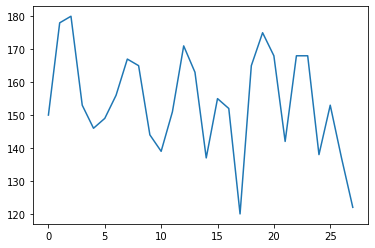

In [91]:
clean_posts_per_day = [len(i) for i in data]
plt.plot(np.arange(28), clean_posts_per_day)

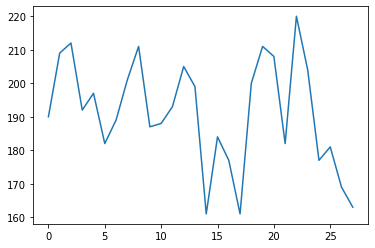

In [88]:
posts_per_day = [len(i) for i in data]
plt.plot(np.arange(28), posts_per_day)

In [92]:
clean_posts_in_feb = np.sum(clean_posts_per_day)
clean_posts_in_feb

4312

In [89]:
posts_in_feb = np.sum(posts_per_day)
posts_in_feb

5353

In [60]:
type(test_post)

list

In [61]:
test_post

[{'subreddit': 'TwoSentenceHorror',
  'selftext': 'The sorrow turned to horror as the first wave of angry, screaming souls that had been trapped within were unleashed upon an unsuspecting universe.',
  'author_fullname': 't2_jmpeowv',
  'gilded': 0,
  'title': 'With great despair, we watched from our escape ships as Earth finally exploded.',
  'link_flair_richtext': [],
  'subreddit_name_prefixed': 'r/TwoSentenceHorror',
  'hidden': False,
  'pwls': 6,
  'link_flair_css_class': None,
  'thumbnail_height': None,
  'top_awarded_type': None,
  'hide_score': True,
  'quarantine': False,
  'link_flair_text_color': 'dark',
  'upvote_ratio': 1.0,
  'author_flair_background_color': None,
  'subreddit_type': 'public',
  'total_awards_received': 0,
  'media_embed': {},
  'thumbnail_width': None,
  'author_flair_template_id': None,
  'is_original_content': False,
  'secure_media': None,
  'is_reddit_media_domain': False,
  'is_meta': False,
  'category': None,
  'secure_media_embed': {},
  'link_

In [55]:
posix_time(before)

1679122800

In [50]:
int(time.mktime(d.timetuple()))

1679122800